In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import calendar
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf
from datetime import timedelta
import warnings
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns 
from ggplot import *
import matplotlib.gridspec as gridspec 
import matplotlib.gridspec as gridspec 
from matplotlib.colors import ListedColormap
import plotly
import plotly.offline as py # make offline 
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.graph_objs as go
from plotly.graph_objs import *
import plotly.tools as tls
import plotly.figure_factory as fig_fact
plotly.tools.set_config_file(world_readable=True, sharing='public')
import re # regular expression
import string # for finding punctuation in text
import nltk # preprocessing text

/Users/emma/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/emma/anaconda/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/emma/anaconda/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp


In [30]:
from ggplot import *

In [2]:
air_visit = pd.read_csv('/Users/emma/Desktop/452/air_visit_data.csv', parse_dates=['visit_date'])
air_reserve = pd.read_csv('/Users/emma/Desktop/452/air_reserve.csv', parse_dates=['reserve_datetime', 'visit_datetime'])
air_store = pd.read_csv('/Users/emma/Desktop/452/air_store_info.csv')
date = pd.read_csv('/Users/emma/Desktop/452/date_info.csv')

In [3]:
mapbox_access_token = 'pk.eyJ1IjoiZW1tYXl1IiwiYSI6ImNqZWV3NjJ5YjFhOHEzM28yMGp2NGJmaGcifQ.thj_-iQAsFi1W5XgOft6Fg'
data = Data([
    Scattermapbox(
        lat=air_store.latitude.tolist(),
        lon=air_store.longitude.tolist(),
        mode='markers',
        # add 'bar' as a marker icon. so it's look beautiful 
        marker=Marker(
            symbol= "bar",
            size=9,
            color = "r"
        )
    )
])
layout = Layout(
    # add title
    title='Zoom to your location and find your desire restaurants',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        # add our access token
        accesstoken=mapbox_access_token,
        bearing=0,
        # add center location to our map
        center=dict(
            lat=36.2048,
            lon=138.2529
        ),
        # use style light
        style='light',
        pitch=0,
        # zoom label to 3
        zoom=3
    ),
)
# let's make the final figure
fig = dict(data=data, layout=layout)
# finally plot the map
py.iplot(fig, filename='Multiple Mapbox')

In [4]:
air_visit['day_of_week'] = air_visit['visit_date'].dt.dayofweek
air_visit.loc[air_visit['day_of_week'] == 0, 'day_of_week'] = 'Monday'
air_visit.loc[air_visit['day_of_week'] == 1, 'day_of_week'] = 'Tuesday'
air_visit.loc[air_visit['day_of_week'] == 2, 'day_of_week'] = 'Wednesday'
air_visit.loc[air_visit['day_of_week'] == 3, 'day_of_week'] = 'Thursday'
air_visit.loc[air_visit['day_of_week'] == 4, 'day_of_week'] = 'Friday'
air_visit.loc[air_visit['day_of_week'] == 5, 'day_of_week'] = 'Saturday'
air_visit.loc[air_visit['day_of_week'] == 6, 'day_of_week'] = 'Sunday'

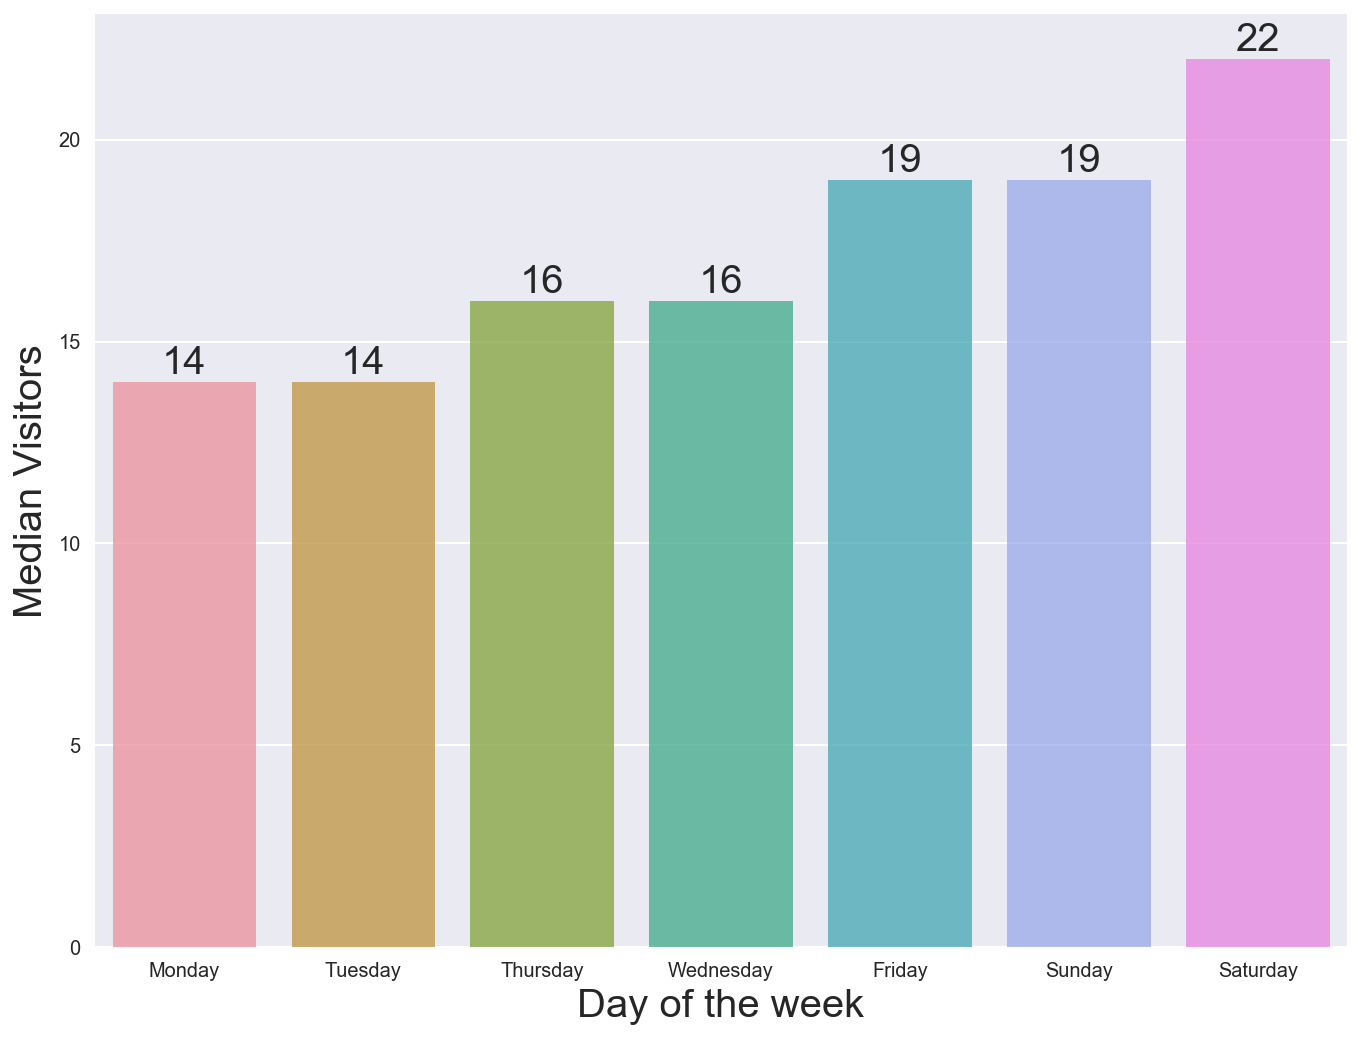

In [5]:
x = air_visit.groupby('day_of_week')['visitors'].median()
x = x.sort_index()
x = x.sort_values()

plt.figure(figsize=(10,8))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.ylabel('Median Visitors', fontsize = 20)
plt.xlabel('Day of the week', fontsize = 20)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize = 20)

plt.show()

In [6]:
air_visit['month'] = air_visit['visit_date'].dt.month
air_visit.loc[air_visit['month'] == 1, 'month'] = 'Jan'
air_visit.loc[air_visit['month'] == 2, 'month'] = 'Feb'
air_visit.loc[air_visit['month'] == 3, 'month'] = 'Mar'
air_visit.loc[air_visit['month'] == 4, 'month'] = 'Apr'
air_visit.loc[air_visit['month'] == 5, 'month'] = 'May'
air_visit.loc[air_visit['month'] == 6, 'month'] = 'Jun'
air_visit.loc[air_visit['month'] == 7, 'month'] = 'Jul'
air_visit.loc[air_visit['month'] == 8, 'month'] = 'Aug'
air_visit.loc[air_visit['month'] == 9, 'month'] = 'Sep'
air_visit.loc[air_visit['month'] == 10, 'month'] = 'Oct'
air_visit.loc[air_visit['month'] == 11, 'month'] = 'Nov'
air_visit.loc[air_visit['month'] == 12, 'month'] = 'Dec'

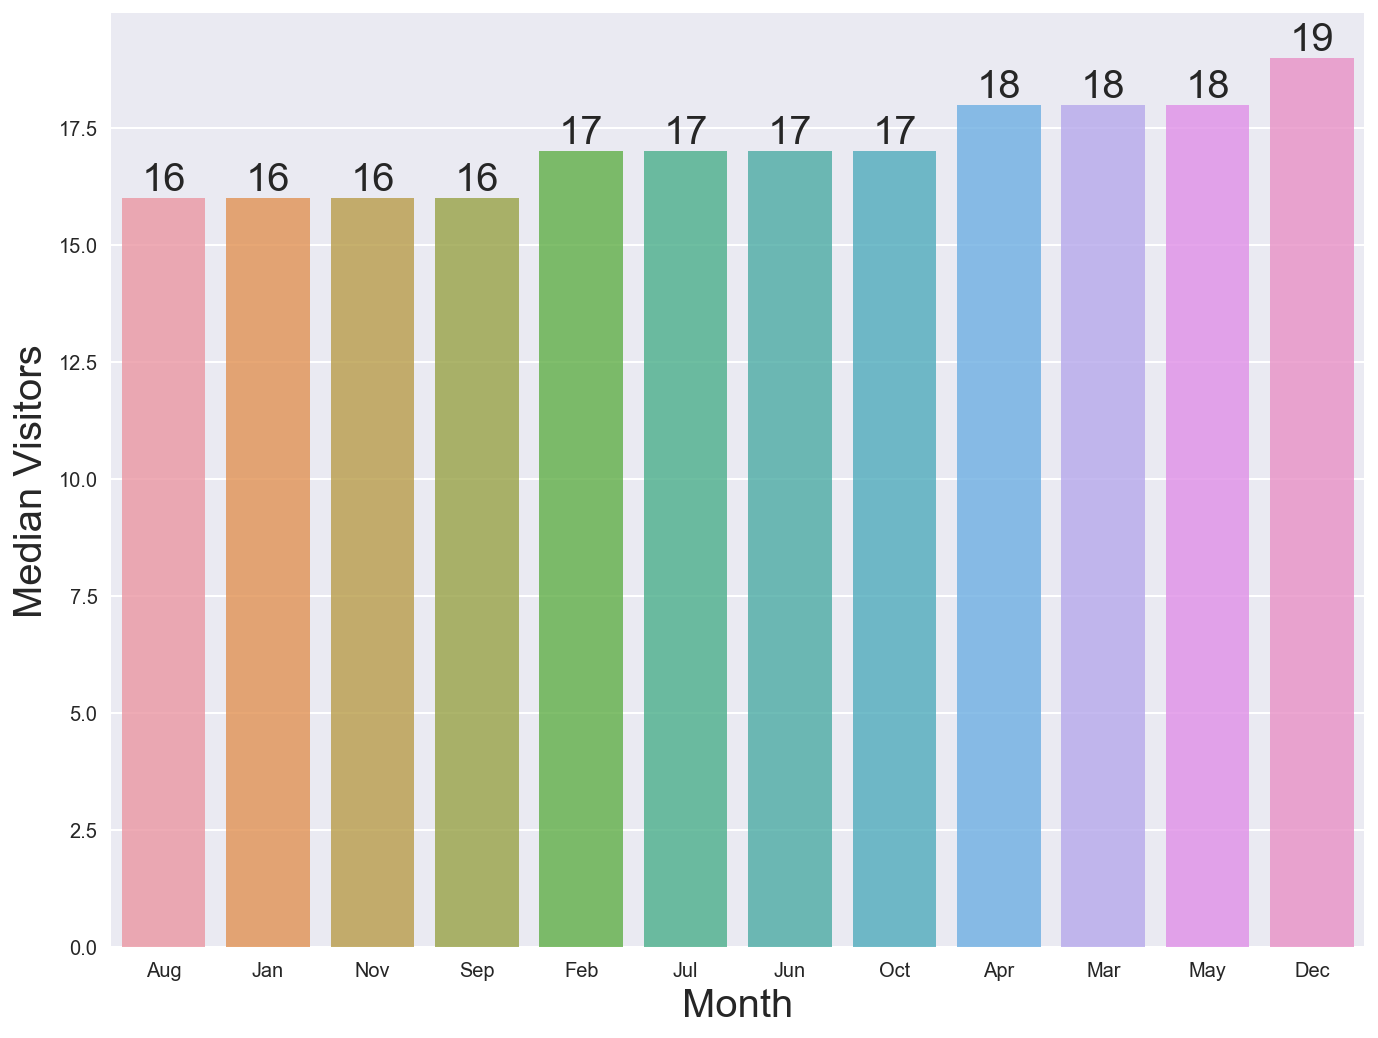

In [7]:
x = air_visit.groupby('month')['visitors'].median()
x = x.sort_index()
x = x.sort_values()

plt.figure(figsize=(10,8))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.ylabel('Median Visitors', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize = 20)

plt.show()

In [8]:
air_store.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


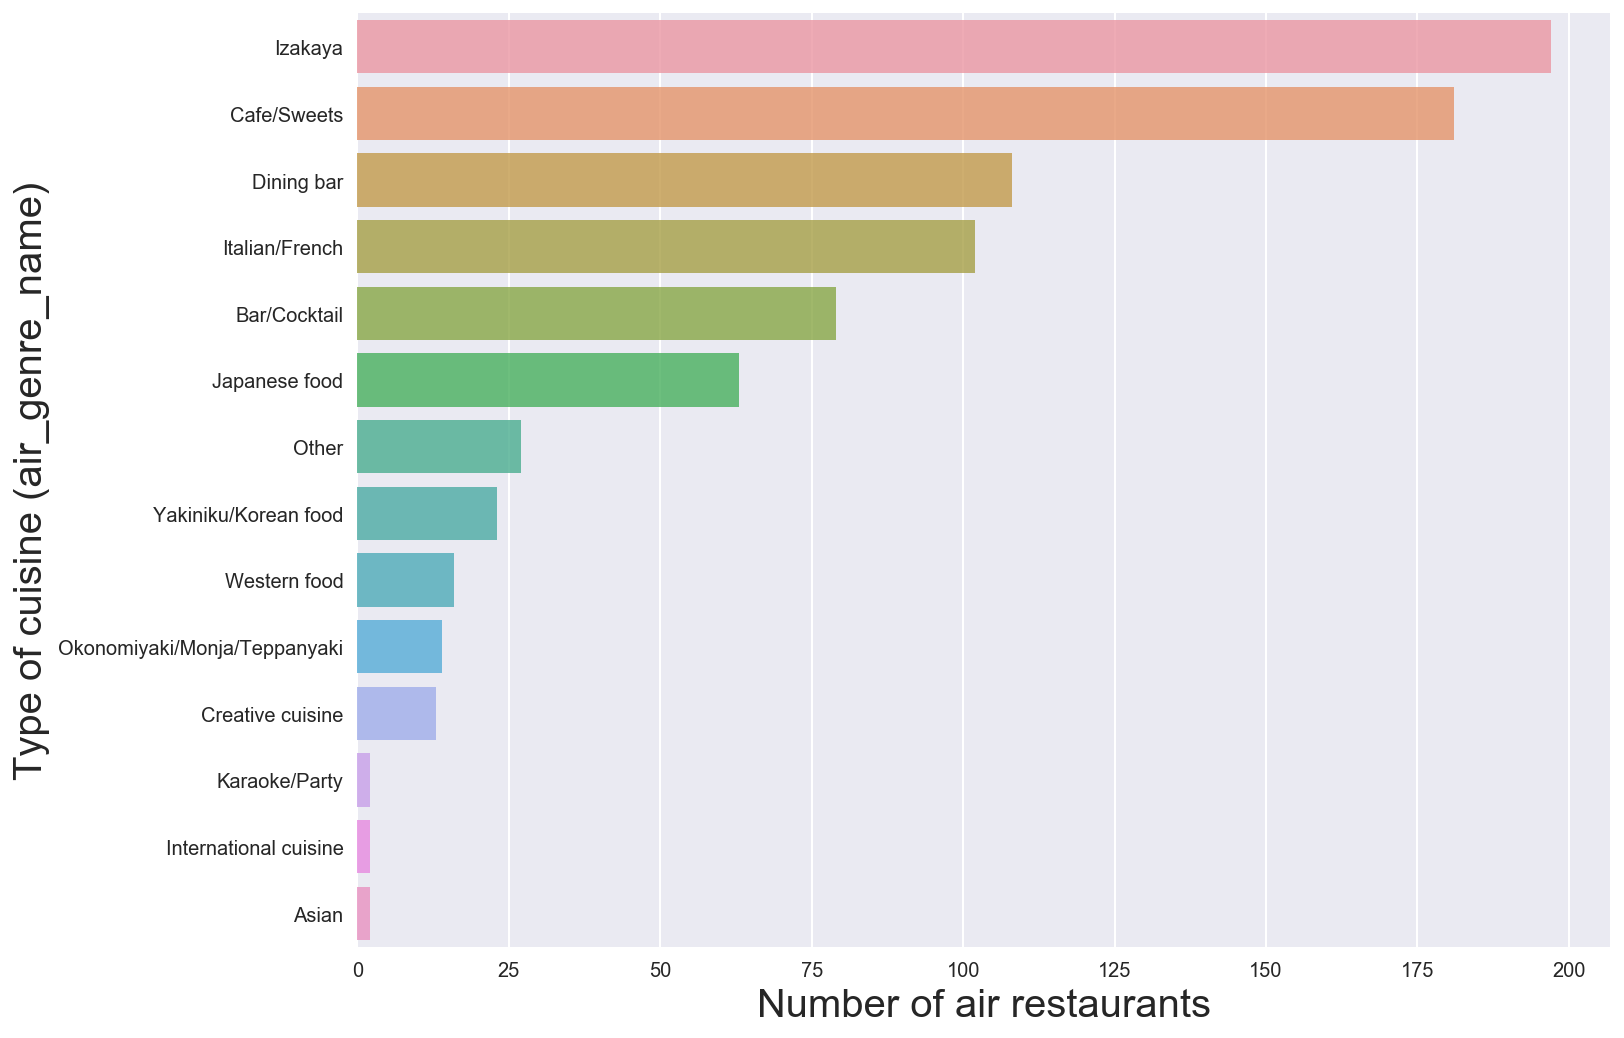

In [9]:
x = air_store.groupby('air_genre_name')['air_genre_name'].count()
x = x.sort_index()
x = x.sort_values(ascending = False)
plt.figure(figsize=(10,8))
ax = sns.barplot(x.values, x.index, alpha=0.8)
plt.ylabel('Type of cuisine (air_genre_name)', fontsize = 20)
plt.xlabel('Number of air restaurants', fontsize = 20)
plt.show()